In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
import seaborn as sns

In [27]:
from tensorflow.keras.datasets import mnist

# Load MNIST data set

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Take a look

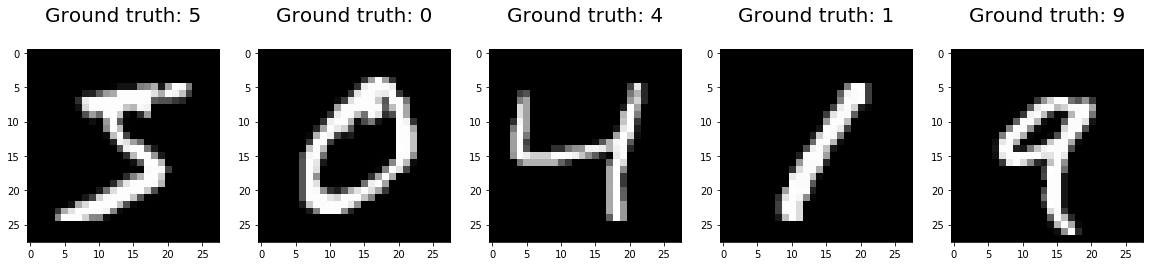

In [48]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Ground truth: %i\n' % label, fontsize = 20)

# Normalize to [0, 1]

In [30]:
x_train = x_train/255
x_test = x_test/255

# Dimension

In [31]:
x_train.shape

(60000, 28, 28)

# We have to transform an image to a column vector

In [32]:
x_train = x_train.reshape(60000, 784)

In [33]:
x_test = x_test.reshape(10000, 784)

In [34]:
y_train[0]

5

# Start to train

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(solver='lbfgs', max_iter= 500)

In [37]:
model.fit(x_train, y_train);

C:\Users\PENG\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Model performance

In [39]:
score = model.score(x_test, y_test)
print(score)

0.9257


# Prediction

In [41]:
predictions = model.predict(x_test)

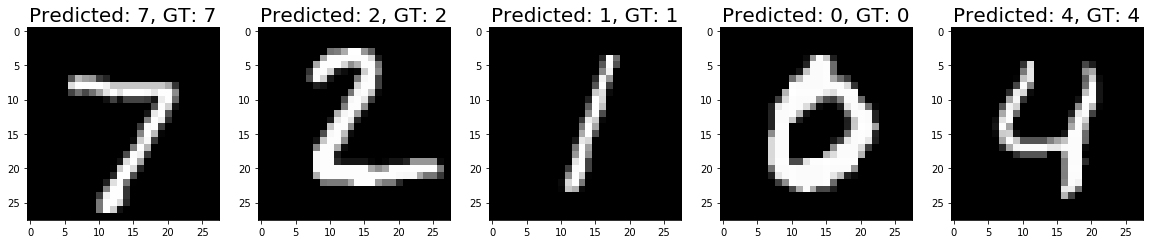

In [58]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, GT: {}'.format(predictions[index], label), fontsize = 20)

# Confusion matrix

In [45]:
cm = metrics.confusion_matrix(y_test, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

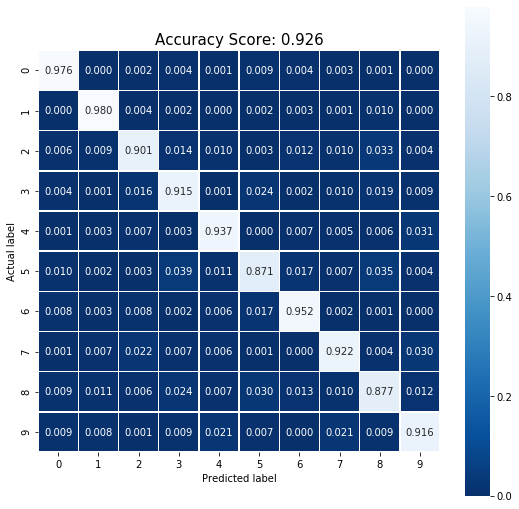

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);

# Misclassified images

In [49]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

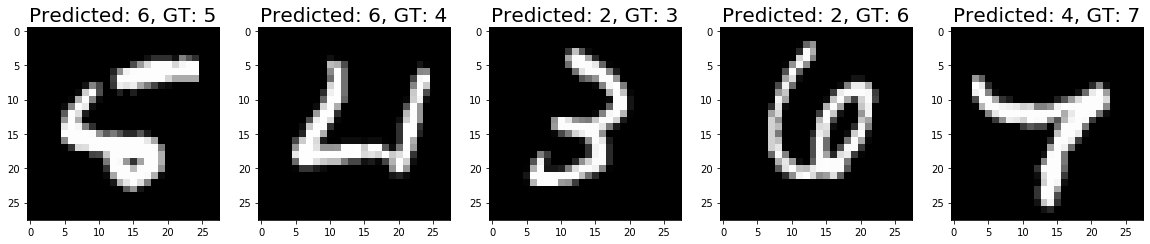

In [54]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, GT: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 20)